# Spatial omic simulations

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os
from time import time
import warnings
import joblib
from pathlib import Path
import copy

from tysserand import tysserand as ty
from mosna import mosna

import matplotlib as mpl
mpl.rcParams["figure.facecolor"] = 'white'
mpl.rcParams["axes.facecolor"] = 'white'
mpl.rcParams["savefig.facecolor"] = 'white'

In [2]:
# If need to reload modules after their modification
from importlib import reload
ty = reload(ty)

In [3]:
# n_spots_w = 5
# n_spots_h = 6
# n_spots = n_spots_w * n_spots_h
n_niches = 2
n_vars = 10

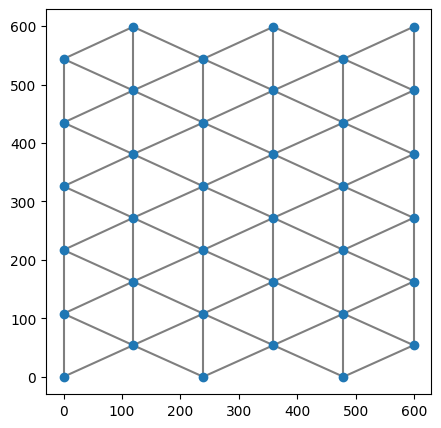

In [4]:
coords, masks, image = ty.make_random_tiles(nb=6, sx=600, sy=600, return_image=True, double_pattern_y=False)
pairs = ty.build_lattice(coords, r=None, lattice='hexagonal')
edges = pd.DataFrame(data=pairs, columns=['source', 'target'])
ty.plot_network(coords, pairs, figsize=(5, 5));

In [5]:
maxi = coords[:, 1].max()
coord_thresh_step = (maxi + 1) / (n_niches)

niches = coords[:, 1] / coord_thresh_step
niches = niches.astype(int)
np.unique(niches, return_counts=True)

(array([0, 1]), array([18, 18]))

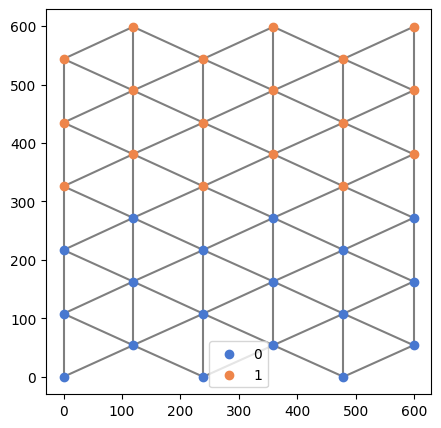

In [6]:
ty.plot_network(coords, pairs, labels=niches, figsize=(5, 5));

In [7]:
# Super simple data generation

data = np.zeros((len(coords), n_vars))

for i in range(n_niches):
    data[niches == i, :] = i

# np.random.uniform(low=0.0, high=1.0, size=None)

In [8]:
columns = [f'var_{i}' for i in range(n_vars)]

nodes = pd.DataFrame(
    data=data,
    columns=columns,
)

## Test the NAS method

In [9]:
method = 'NAS'

order = 1
stat_funcs = np.mean
stat_names = 'mean'

# For UMAP visualization
marker = '.'
size_points = 10

In [10]:
var_aggreg = mosna.make_features_NAS(
    X=data.astype(float), 
    pairs=edges.values, 
    order=order, 
    var_names=columns, 
    stat_funcs=stat_funcs, 
    stat_names=stat_names,
    )

In [11]:
var_aggreg.loc[:, :] = np.round(var_aggreg.values, 2)
var_aggreg

,var_0 mean,var_1 mean,var_2 mean,var_3 mean,var_4 mean,var_5 mean,var_6 mean,var_7 mean,var_8 mean,var_9 mean
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


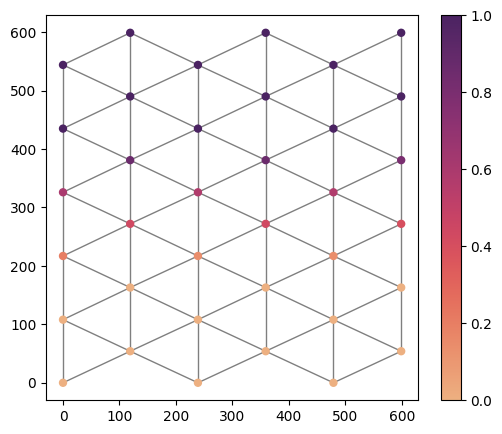

In [12]:
cmap_nodes = sns.color_palette("flare", as_cmap=True)
fig, ax = plt.subplots(figsize=(6, 5))
sc = ax.scatter(coords[:,0], coords[:,1], c=var_aggreg['var_0 mean'], cmap=cmap_nodes, 
            marker='.', s=100, zorder=10)
plt.colorbar(sc)

# plot edges
for pair in pairs[:,:]:
    [x0, y0], [x1, y1] = coords[pair]
    ax.plot([x0, x1], [y0, y1], c='k', zorder=5, alpha=0.5, linewidth=1)


In [13]:
from umap import UMAP

reducer = UMAP(
    random_state=0,
    n_components=2,
    n_neighbors=10,
    # metric=metric,
    # min_dist=min_dist,
    )
embedding = reducer.fit_transform(var_aggreg)

/home/alexis/miniconda3/envs/mosna-anndata/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


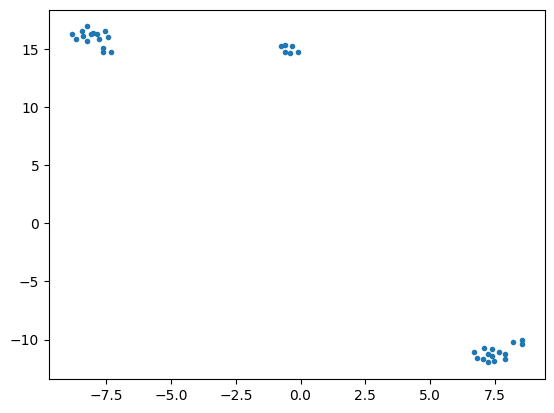

In [14]:
plt.scatter(embedding[:, 0], embedding[:, 1], marker='.');

In [15]:
embedding_pairs = ty.build_knn(embedding, k=10, metric='euclidean')

edges_np = np.hstack((embedding_pairs, np.ones((len(embedding_pairs), 1)))).astype(np.int32)
edges_mosna = pd.DataFrame(edges_np, columns=['src', 'dst', 'weight'])
G = ty.to_iGraph(embedding, embedding_pairs)

In [16]:

# Leiden clustering
import leidenalg as la
partition = la.find_partition(G, la.RBConfigurationVertexPartition, resolution_parameter=0.005, seed=0)
# or other partition such as la.RBERVertexPartition
cluster_labels = np.array(partition.membership)

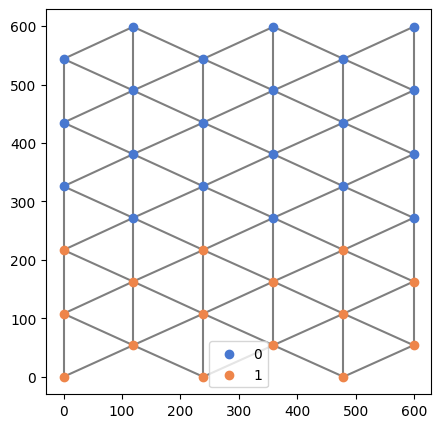

In [17]:
ty.plot_network(coords, pairs, labels=cluster_labels, figsize=(5, 5));

In [18]:
ari = adjusted_rand_score(niches, cluster_labels)
print(f"ARI: {ari}")

ARI: 0.6857142857142857


### Try the end-user pipeline

In [19]:
processed_dir = Path('../data/processed/spatial_simulations')
reconst_dir = processed_dir / f"simulations_n_nodes-{len(coords)}_n_niches-{n_niches}_n_vars-{n_vars}_distrib-{'uniform'}"
reconst_dir.mkdir(parents=True, exist_ok=True)

uniq_patients = [0]
uniq_samples = [0]

In [20]:
make_figures = False
save_coords_in_nodes = True

sample_id = uniq_samples[0]
patient_id = uniq_patients[0]

# coords = # already defined
# pairs = # already defined
# add annotations
nodes_labels = niches

edges = pd.DataFrame(data=pairs, columns=['source', 'target'])
edges.to_parquet(reconst_dir / f'edges_patient-{patient_id}_sample-{sample_id}.parquet', index=False)

# data = # already defined
# columns = # already defined

nodes = pd.DataFrame(
    data=data,
    columns=columns,
)
if save_coords_in_nodes:
    coords = pd.DataFrame(coords, columns=['y', 'x'], index=nodes.index)
    nodes = pd.concat([nodes, coords], axis=1)
nodes.to_parquet(reconst_dir / f'nodes_patient-{patient_id}_sample-{sample_id}.parquet', index=False)

attributes_col = columns
del data, nodes, edges, coords, pairs

In [21]:
method = 'NAS'
# method = 'SCAN-IT'

order = 1
var_type = 'counts'
stat_funcs = np.mean
stat_names = 'mean'

if method == 'NAS':
    # directory of spatial omic features
    sof_dir = reconst_dir / f"nas_on-{var_type}_stats-{stat_names}_order-{order}"
    # sof_dir = reconst_dir / f"nas_on-{var_type}_{deg_str}_stats-{stat_names}_order-{order}"
    sof_dir.mkdir(parents=True, exist_ok=True)
elif method == 'SCAN-IT':
    # directory of spatial omic features
    sof_dir = reconst_dir / f"scanit_on-{var_type}"    
    sof_dir.mkdir(parents=True, exist_ok=True)

# For UMAP visualization
marker = '.'
size_points = 10

In [22]:
node_file = list(reconst_dir.glob('nodes_*.parquet'))[0]
attributes_col = pd.read_parquet(node_file).columns[:-2]

In [23]:
filename = sof_dir / f'aggregation_statistics.parquet'

if filename.exists():
    print('Load aggregation statistics')
    var_aggreg = pd.read_parquet(filename)
else:
    var_aggreg = mosna.compute_spatial_omic_features_all_networks(
        method=method,
        net_dir=reconst_dir, 
        attributes_col=attributes_col, 
        use_attributes=None, # use all attributes 
        # use_attributes=uniq_deg, # use DEG between layers
        make_onehot=False, 
        order=order,
        stat_funcs=stat_funcs,
        stat_names=stat_names,
        id_level_1='patient',
        id_level_2='sample', 
        extension='parquet',
        data_index=None,
        parallel_groups=False, #'max', 
        memory_limit='max',
        save_intermediate_results=False, 
        dir_save_interm=None,
        verbose=1,
        )
    var_aggreg.to_parquet(filename, index=False)

data: 100%|██████████| 1/1 [00:00<00:00, 117.29it/s]


In [24]:
var_aggreg

,var_0 mean,var_1 mean,var_2 mean,var_3 mean,var_4 mean,var_5 mean,var_6 mean,var_7 mean,var_8 mean,var_9 mean,patient,sample
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0


In [25]:
# retrieve network info and remove it from NAS table
var_aggreg_samples_info = var_aggreg[['patient', 'sample']]
var_aggreg.drop(columns=['patient', 'sample'], inplace=True)

In [26]:
cluster_params = {
    'reducer_type': 'umap', 
    'n_neighbors': 10, 
    # 'metric': 'manhattan', # or 'euclidean',
    'metric': 'euclidean', 
    'min_dist': 0.0,
    'clusterer_type': 'leiden', 
    'dim_clust': 2, 
    'k_cluster': 10, 
    'resolution_parameter': 0.005,
}

cluster_labels, cluster_dir, nb_clust, _ = mosna.get_clusterer(var_aggreg, sof_dir, **cluster_params)

Computing dimensionality reduction
Performing clustering
Found 2 clusters


Computing dimensionality reduction


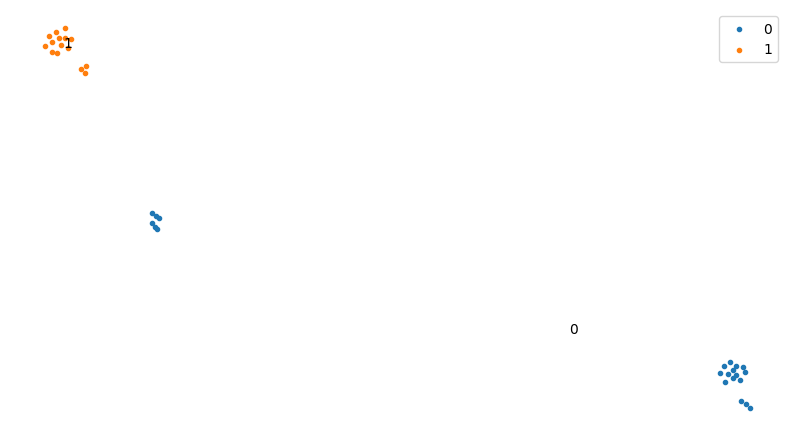

In [27]:
embed_viz, _ = mosna.get_reducer(
    var_aggreg, 
    sof_dir, 
    reducer_type='umap', 
    n_neighbors=10, 
    metric='manhattan',
    )

fig, ax, niches_color_mapper = mosna.plot_clusters(
    embed_viz, 
    cluster_labels, 
    sof_dir, 
    cluster_params=cluster_params, 
    return_cmap=True,
    )

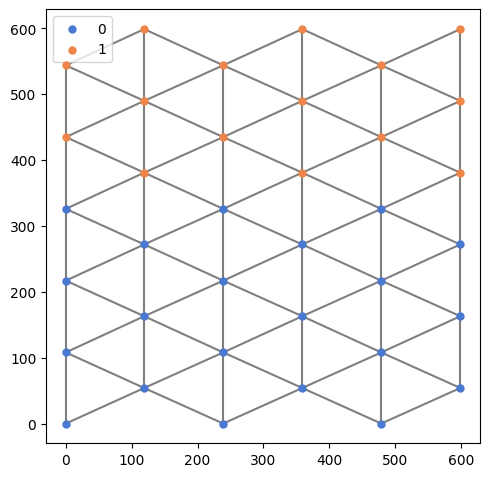

In [28]:
niche_colors = np.array([niches_color_mapper[x] for x in cluster_labels])

plots_marker = '.'

edges = pd.read_parquet(reconst_dir / f'edges_patient-{patient_id}_sample-{sample_id}.parquet')
nodes = pd.read_parquet(reconst_dir / f'nodes_patient-{patient_id}_sample-{sample_id}.parquet')
use_cols = [x for x in nodes.columns if x not in ('x', 'y')]
coords = nodes[['y', 'x']].values
nodes = nodes[use_cols]
pairs = edges.values


# Big summary plot
fig, ax = plt.subplots(figsize=(5, 5), tight_layout=False)

ty.plot_network(
    coords, 
    pairs, 
    labels=cluster_labels, 
    marker='.', 
    size_nodes=100, 
    # legend_opt={'loc': 'center left', 'bbox_to_anchor': (1.05, 0.5)},
    ax=ax,
    )
ax.set_aspect('equal')

In [29]:
ari = adjusted_rand_score(niches, cluster_labels)
print(f"ARI: {ari}")

ARI: 0.6857142857142857


In [35]:
reload(mosna)

<module 'mosna.mosna' from '/home/alexis/Pro/Postdoc_CRCT/Projects/mosna/mosna/mosna.py'>

Loading clusterer object and cluster labels
There are 2 clusters
Loading reducer object and reduced coordinates
ARI: 0.6857142857142857


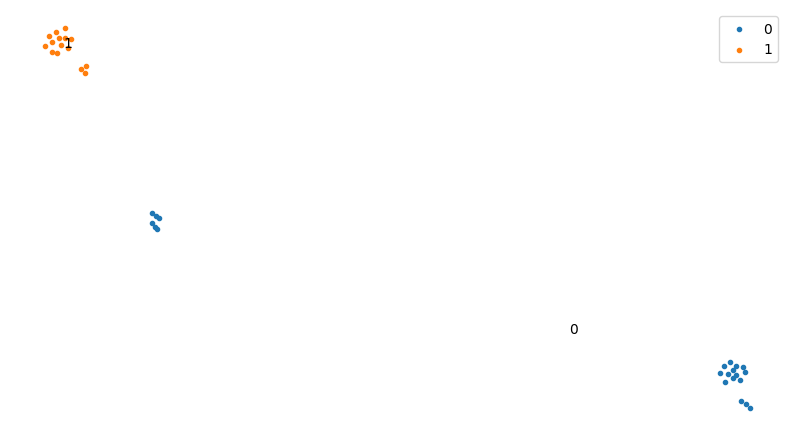

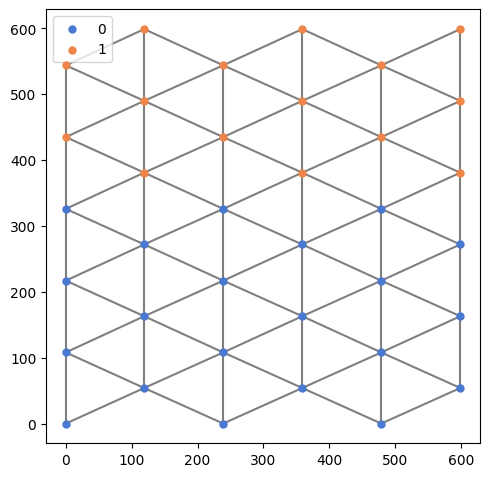

In [33]:
# CellCharter flavour
n_neighbors = 10

cluster_params = {
    'flavor': 'CellCharter',
    # 'reducer_type': 'umap',  # 'umap' if CellCharter
    'n_neighbors': 15, 
    'metric': 'manhattan', # or 'euclidean',
    # 'metric': 'euclidean',
    'min_dist': 0.0,
    # 'clusterer_type': 'leiden', # 'gmm' if CellCharter
    'dim_clust': 2, 
    'n_clusters': 2,
}

cluster_labels, cluster_dir, nb_clust, _ = mosna.get_clusterer(var_aggreg, sof_dir, **cluster_params)

embed_viz, _ = mosna.get_reducer(
    var_aggreg, 
    sof_dir, 
    reducer_type='umap', 
    n_neighbors=n_neighbors, 
    metric='manhattan',
    )

fig, ax, niches_color_mapper = mosna.plot_clusters(
    embed_viz, 
    cluster_labels, 
    sof_dir, 
    cluster_params=cluster_params, 
    return_cmap=True,
    )

niche_colors = np.array([niches_color_mapper[x] for x in cluster_labels])

plots_marker = '.'

edges = pd.read_parquet(reconst_dir / f'edges_patient-{patient_id}_sample-{sample_id}.parquet')
nodes = pd.read_parquet(reconst_dir / f'nodes_patient-{patient_id}_sample-{sample_id}.parquet')
use_cols = [x for x in nodes.columns if x not in ('x', 'y')]
coords = nodes[['y', 'x']].values
nodes = nodes[use_cols]
pairs = edges.values


# Big summary plot
fig, ax = plt.subplots(figsize=(5, 5), tight_layout=False)

ty.plot_network(
    coords, 
    pairs, 
    labels=cluster_labels, 
    marker='.', 
    size_nodes=100, 
    # legend_opt={'loc': 'center left', 'bbox_to_anchor': (1.05, 0.5)},
    ax=ax,
    )
ax.set_aspect('equal')

ari = adjusted_rand_score(niches, cluster_labels)
print(f"ARI: {ari}")

### Make more complex data

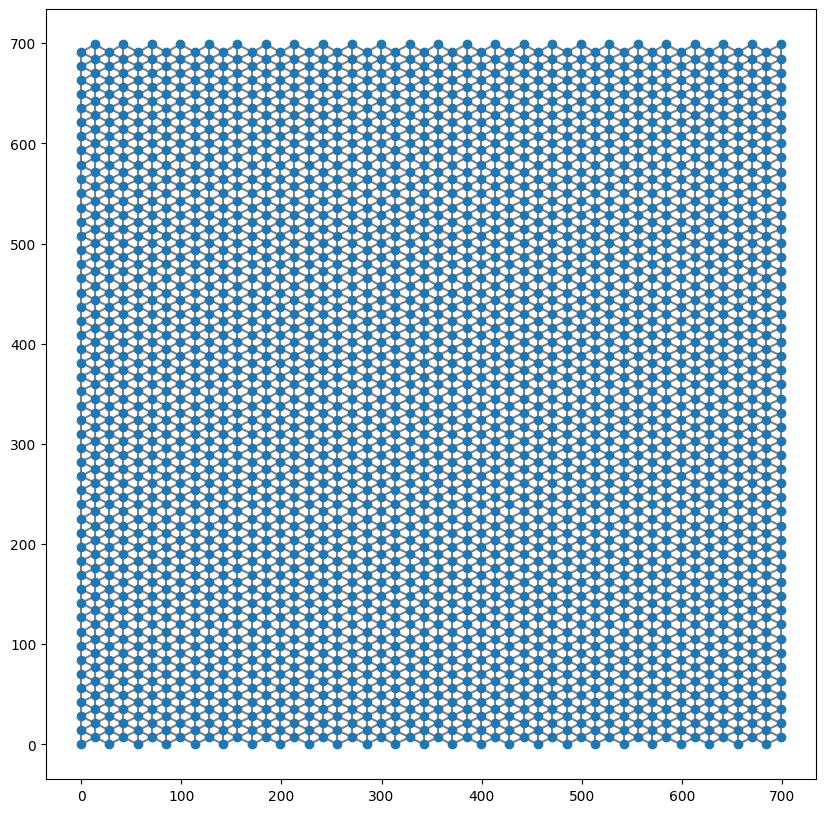

In [53]:
n_niches = 7
n_vars = 50
n_nodes_w = 50

coords, masks, image = ty.make_random_tiles(nb=n_nodes_w, sx=700, sy=700, return_image=True, double_pattern_y=False)
pairs = ty.build_lattice(coords, r=None, lattice='hexagonal')
edges = pd.DataFrame(data=pairs, columns=['source', 'target'])
ty.plot_network(coords, pairs, figsize=(10, 10));

In [54]:
maxi = coords[:, 1].max()
coord_thresh_step = (maxi + 1) / (n_niches)

niches = coords[:, 1] / coord_thresh_step
niches = niches.astype(int)
np.unique(niches, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]), array([375, 350, 350, 350, 350, 350, 375]))

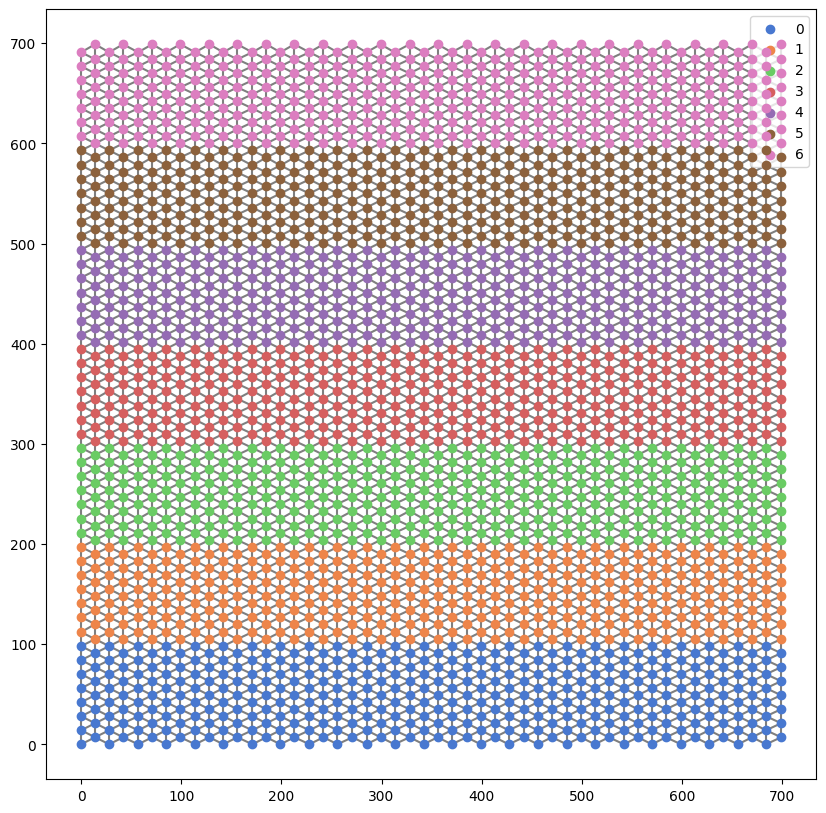

In [55]:
ty.plot_network(coords, pairs, labels=niches, figsize=(10, 10));

In [56]:
data = np.zeros((len(coords), n_vars))

for i in range(n_niches):
    data[niches == i, :] = i

# np.random.uniform(low=0.0, high=1.0, size=None)

In [57]:
columns = [f'var_{i}' for i in range(n_vars)]

nodes = pd.DataFrame(
    data=data,
    columns=columns,
)

In [58]:
processed_dir = Path('../data/processed/spatial_simulations')
reconst_dir = processed_dir / f"simulations_n_nodes-{len(coords)}_n_niches-{n_niches}_n_vars-{n_vars}_distrib-{'uniform'}"
reconst_dir.mkdir(parents=True, exist_ok=True)

uniq_patients = [0]
uniq_samples = [0]

In [59]:
make_figures = False
save_coords_in_nodes = True

sample_id = uniq_samples[0]
patient_id = uniq_patients[0]

# coords = # already defined
# pairs = # already defined
# add annotations
nodes_labels = niches

edges = pd.DataFrame(data=pairs, columns=['source', 'target'])
edges.to_parquet(reconst_dir / f'edges_patient-{patient_id}_sample-{sample_id}.parquet', index=False)

# data = # already defined
# columns = # already defined

nodes = pd.DataFrame(
    data=data,
    columns=columns,
)
if save_coords_in_nodes:
    coords = pd.DataFrame(coords, columns=['y', 'x'], index=nodes.index)
    nodes = pd.concat([nodes, coords], axis=1)
nodes.to_parquet(reconst_dir / f'nodes_patient-{patient_id}_sample-{sample_id}.parquet', index=False)

attributes_col = columns
del data, nodes, edges, coords, pairs

In [60]:
method = 'NAS'
# method = 'SCAN-IT'

order = 1
var_type = 'counts'
stat_funcs = np.mean
stat_names = 'mean'

if method == 'NAS':
    # directory of spatial omic features
    sof_dir = reconst_dir / f"nas_on-{var_type}_stats-{stat_names}_order-{order}"
    # sof_dir = reconst_dir / f"nas_on-{var_type}_{deg_str}_stats-{stat_names}_order-{order}"
    sof_dir.mkdir(parents=True, exist_ok=True)
elif method == 'SCAN-IT':
    # directory of spatial omic features
    sof_dir = reconst_dir / f"scanit_on-{var_type}"    
    sof_dir.mkdir(parents=True, exist_ok=True)

# For UMAP visualization
marker = '.'
size_points = 10

In [61]:
node_file = list(reconst_dir.glob('nodes_*.parquet'))[0]
attributes_col = pd.read_parquet(node_file).columns[:-2]

In [62]:
filename = sof_dir / f'aggregation_statistics.parquet'

if filename.exists():
    print('Load aggregation statistics')
    var_aggreg = pd.read_parquet(filename)
else:
    var_aggreg = mosna.compute_spatial_omic_features_all_networks(
        method=method,
        net_dir=reconst_dir, 
        attributes_col=attributes_col, 
        use_attributes=None, # use all attributes 
        # use_attributes=uniq_deg, # use DEG between layers
        make_onehot=False, 
        order=order,
        stat_funcs=stat_funcs,
        stat_names=stat_names,
        id_level_1='patient',
        id_level_2='sample', 
        extension='parquet',
        data_index=None,
        parallel_groups=False, #'max', 
        memory_limit='max',
        save_intermediate_results=False, 
        dir_save_interm=None,
        verbose=1,
        )
    var_aggreg.to_parquet(filename, index=False)

Load aggregation statistics


In [63]:
var_aggreg

,var_0 mean,var_1 mean,var_2 mean,var_3 mean,var_4 mean,var_5 mean,var_6 mean,var_7 mean,var_8 mean,var_9 mean,...,var_42 mean,var_43 mean,var_44 mean,var_45 mean,var_46 mean,var_47 mean,var_48 mean,var_49 mean,patient,sample
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,0,0
2496,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,0,0
2497,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,0,0
2498,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,0,0


In [64]:
# retrieve network info and remove it from NAS table
var_aggreg_samples_info = var_aggreg[['patient', 'sample']]
var_aggreg.drop(columns=['patient', 'sample'], inplace=True)

Loading clusterer object and cluster labels
There are 31 clusters
Loading reducer object and reduced coordinates
ARI: 0.7214594614324047


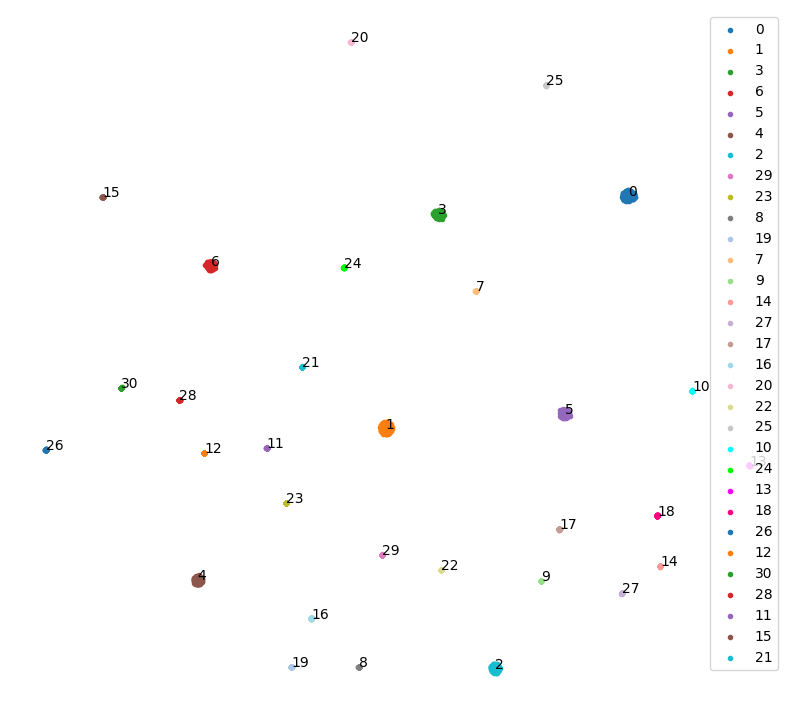

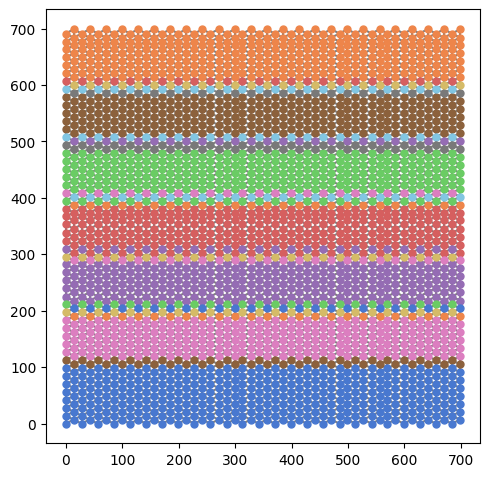

In [65]:
n_neighbors = 10

cluster_params = {
    'reducer_type': 'umap', 
    'n_neighbors': n_neighbors, 
    # 'metric': 'manhattan', # or 'euclidean',
    'metric': 'euclidean', 
    'min_dist': 0.0,
    'clusterer_type': 'leiden', 
    'dim_clust': 2, 
    'k_cluster': n_neighbors, 
    'resolution_parameter': 0.005,
}

cluster_labels, cluster_dir, nb_clust, _ = mosna.get_clusterer(var_aggreg, sof_dir, **cluster_params)

embed_viz, _ = mosna.get_reducer(
    var_aggreg, 
    sof_dir, 
    reducer_type='umap', 
    n_neighbors=n_neighbors, 
    metric='manhattan',
    )

fig, ax, niches_color_mapper = mosna.plot_clusters(
    embed_viz, 
    cluster_labels, 
    sof_dir, 
    cluster_params=cluster_params, 
    return_cmap=True,
    )

niche_colors = np.array([niches_color_mapper[x] for x in cluster_labels])

plots_marker = '.'

edges = pd.read_parquet(reconst_dir / f'edges_patient-{patient_id}_sample-{sample_id}.parquet')
nodes = pd.read_parquet(reconst_dir / f'nodes_patient-{patient_id}_sample-{sample_id}.parquet')
use_cols = [x for x in nodes.columns if x not in ('x', 'y')]
coords = nodes[['y', 'x']].values
nodes = nodes[use_cols]
pairs = edges.values


# Big summary plot
fig, ax = plt.subplots(figsize=(5, 5), tight_layout=False)

ty.plot_network(
    coords, 
    pairs, 
    labels=cluster_labels, 
    marker='.', 
    size_nodes=100, 
    # legend_opt={'loc': 'center left', 'bbox_to_anchor': (1.05, 0.5)},
    ax=ax,
    legend=False,
    )
ax.set_aspect('equal')

ari = adjusted_rand_score(niches, cluster_labels)
print(f"ARI: {ari}")

Loading clusterer object and cluster labels
There are 7 clusters
Loading reducer object and reduced coordinates
ARI: 0.6286251692973654


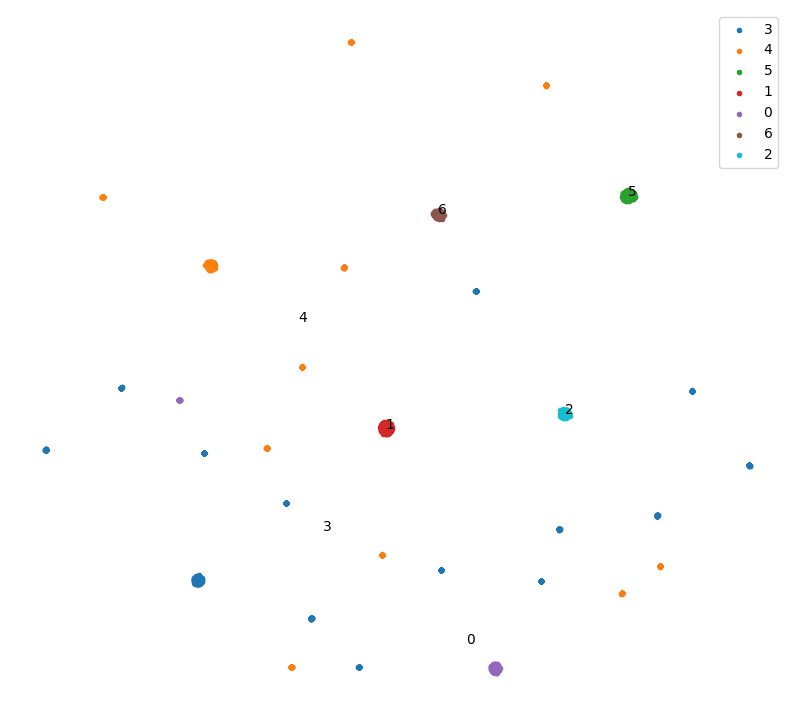

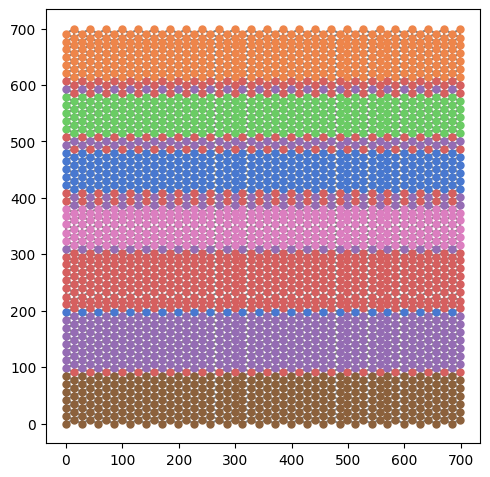

In [67]:
# CellCharter flavour
n_neighbors = 10

cluster_params = {
    'flavor': 'CellCharter',
    # 'reducer_type': 'umap',  # 'umap' if CellCharter
    'n_neighbors': 15, 
    'metric': 'manhattan', # or 'euclidean',
    # 'metric': 'euclidean',
    'min_dist': 0.0,
    # 'clusterer_type': 'leiden', # 'gmm' if CellCharter
    'dim_clust': 2, 
    'n_clusters': 7,
}

cluster_labels, cluster_dir, nb_clust, _ = mosna.get_clusterer(var_aggreg, sof_dir, **cluster_params)

embed_viz, _ = mosna.get_reducer(
    var_aggreg, 
    sof_dir, 
    reducer_type='umap', 
    n_neighbors=n_neighbors, 
    metric='manhattan',
    )

fig, ax, niches_color_mapper = mosna.plot_clusters(
    embed_viz, 
    cluster_labels, 
    sof_dir, 
    cluster_params=cluster_params, 
    return_cmap=True,
    )

niche_colors = np.array([niches_color_mapper[x] for x in cluster_labels])

plots_marker = '.'

edges = pd.read_parquet(reconst_dir / f'edges_patient-{patient_id}_sample-{sample_id}.parquet')
nodes = pd.read_parquet(reconst_dir / f'nodes_patient-{patient_id}_sample-{sample_id}.parquet')
use_cols = [x for x in nodes.columns if x not in ('x', 'y')]
coords = nodes[['y', 'x']].values
nodes = nodes[use_cols]
pairs = edges.values


# Big summary plot
fig, ax = plt.subplots(figsize=(5, 5), tight_layout=False)

ty.plot_network(
    coords, 
    pairs, 
    labels=cluster_labels, 
    marker='.', 
    size_nodes=100, 
    # legend_opt={'loc': 'center left', 'bbox_to_anchor': (1.05, 0.5)},
    ax=ax,
    legend=False,
    )
ax.set_aspect('equal')

ari = adjusted_rand_score(niches, cluster_labels)
print(f"ARI: {ari}")

#### other distribution

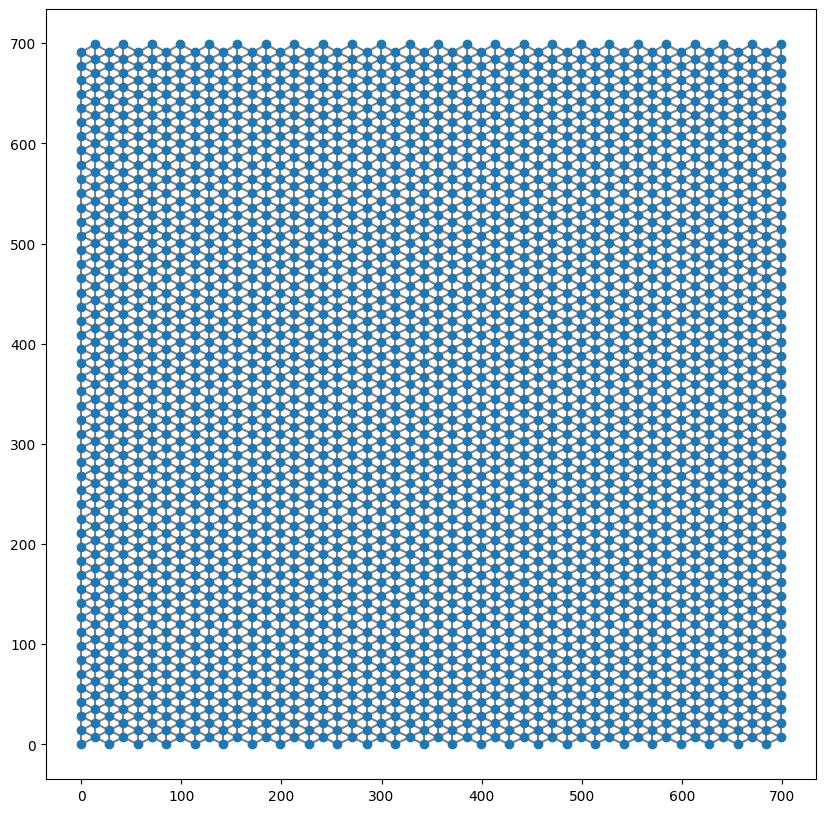

In [69]:
n_niches = 7
n_vars = 50
n_nodes_w = 50

coords, masks, image = ty.make_random_tiles(nb=n_nodes_w, sx=700, sy=700, return_image=True, double_pattern_y=False)
pairs = ty.build_lattice(coords, r=None, lattice='hexagonal')
edges = pd.DataFrame(data=pairs, columns=['source', 'target'])
ty.plot_network(coords, pairs, figsize=(10, 10));

In [70]:
maxi = coords[:, 1].max()
coord_thresh_step = (maxi + 1) / (n_niches)

niches = coords[:, 1] / coord_thresh_step
niches = niches.astype(int)
np.unique(niches, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]), array([375, 350, 350, 350, 350, 350, 375]))

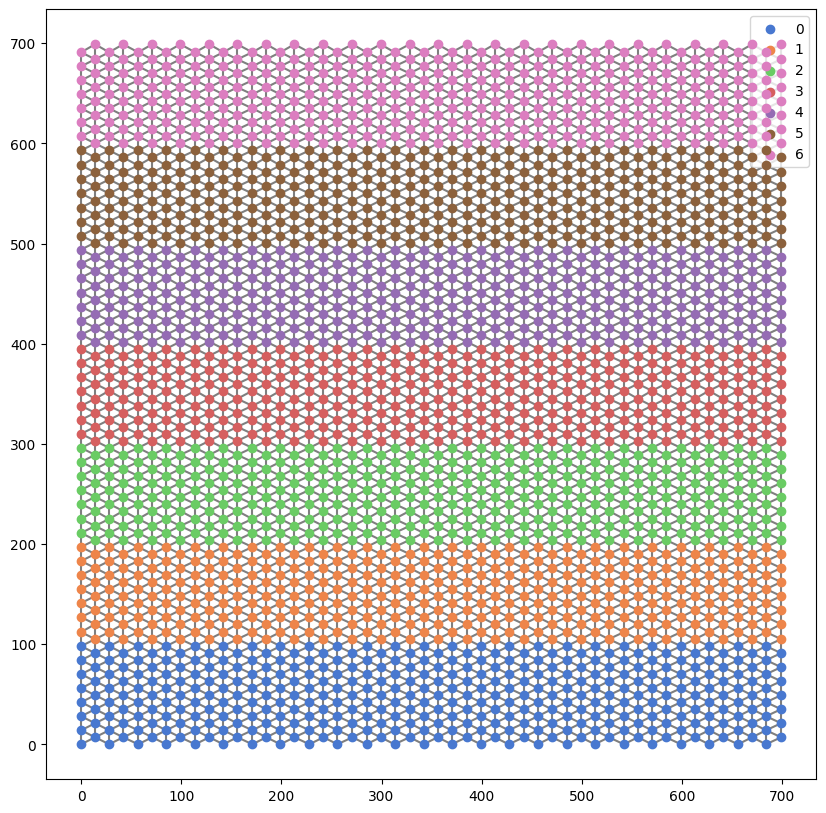

In [71]:
ty.plot_network(coords, pairs, labels=niches, figsize=(10, 10));

In [72]:
data = np.zeros((len(coords), n_vars))

for i in range(n_niches):
    select = niches == i
    n_select = select.sum()
    data[select, :] = np.random.uniform(low=10*i, high=10*i+1, size=(n_select, n_vars))
    # for j in range(n_vars):
    #     data[select, j] = np.random.uniform(low=10*i, high=10*i+1, size=None)

In [73]:
columns = [f'var_{i}' for i in range(n_vars)]

nodes = pd.DataFrame(
    data=data,
    columns=columns,
)

In [74]:
processed_dir = Path('../data/processed/spatial_simulations')
reconst_dir = processed_dir / f"simulations_n_nodes-{len(coords)}_n_niches-{n_niches}_n_vars-{n_vars}_distrib-{'uniform_varying'}"
reconst_dir.mkdir(parents=True, exist_ok=True)

uniq_patients = [0]
uniq_samples = [0]

In [75]:
make_figures = False
save_coords_in_nodes = True

sample_id = uniq_samples[0]
patient_id = uniq_patients[0]

# coords = # already defined
# pairs = # already defined
# add annotations
nodes_labels = niches

edges = pd.DataFrame(data=pairs, columns=['source', 'target'])
edges.to_parquet(reconst_dir / f'edges_patient-{patient_id}_sample-{sample_id}.parquet', index=False)

# data = # already defined
# columns = # already defined

nodes = pd.DataFrame(
    data=data,
    columns=columns,
)
if save_coords_in_nodes:
    coords = pd.DataFrame(coords, columns=['y', 'x'], index=nodes.index)
    nodes = pd.concat([nodes, coords], axis=1)
nodes.to_parquet(reconst_dir / f'nodes_patient-{patient_id}_sample-{sample_id}.parquet', index=False)

attributes_col = columns
del data, nodes, edges, coords, pairs

In [76]:
method = 'NAS'
# method = 'SCAN-IT'

order = 1
var_type = 'counts'
stat_funcs = np.mean
stat_names = 'mean'

if method == 'NAS':
    # directory of spatial omic features
    sof_dir = reconst_dir / f"nas_on-{var_type}_stats-{stat_names}_order-{order}"
    # sof_dir = reconst_dir / f"nas_on-{var_type}_{deg_str}_stats-{stat_names}_order-{order}"
    sof_dir.mkdir(parents=True, exist_ok=True)
elif method == 'SCAN-IT':
    # directory of spatial omic features
    sof_dir = reconst_dir / f"scanit_on-{var_type}"    
    sof_dir.mkdir(parents=True, exist_ok=True)

# For UMAP visualization
marker = '.'
size_points = 10

In [77]:
node_file = list(reconst_dir.glob('nodes_*.parquet'))[0]
attributes_col = pd.read_parquet(node_file).columns[:-2]

In [78]:
filename = sof_dir / f'aggregation_statistics.parquet'

if filename.exists():
    print('Load aggregation statistics')
    var_aggreg = pd.read_parquet(filename)
else:
    var_aggreg = mosna.compute_spatial_omic_features_all_networks(
        method=method,
        net_dir=reconst_dir, 
        attributes_col=attributes_col, 
        use_attributes=None, # use all attributes 
        # use_attributes=uniq_deg, # use DEG between layers
        make_onehot=False, 
        order=order,
        stat_funcs=stat_funcs,
        stat_names=stat_names,
        id_level_1='patient',
        id_level_2='sample', 
        extension='parquet',
        data_index=None,
        parallel_groups=False, #'max', 
        memory_limit='max',
        save_intermediate_results=False, 
        dir_save_interm=None,
        verbose=1,
        )
    var_aggreg.to_parquet(filename, index=False)

data: 100%|██████████| 1/1 [00:00<00:00,  8.73it/s]


In [79]:
var_aggreg

,var_0 mean,var_1 mean,var_2 mean,var_3 mean,var_4 mean,var_5 mean,var_6 mean,var_7 mean,var_8 mean,var_9 mean,...,var_42 mean,var_43 mean,var_44 mean,var_45 mean,var_46 mean,var_47 mean,var_48 mean,var_49 mean,patient,sample
0,0.441742,0.695647,0.508939,0.481545,0.354852,0.551234,0.878127,0.520856,0.400641,0.513161,...,0.870952,0.617106,0.426688,0.375665,0.305173,0.550875,0.678924,0.506972,0,0
1,0.582368,0.395906,0.444303,0.487794,0.647543,0.440237,0.574086,0.363493,0.291618,0.467810,...,0.474988,0.506058,0.407841,0.502075,0.186737,0.554254,0.565509,0.622508,0,0
2,0.513589,0.679809,0.553307,0.585244,0.489052,0.453873,0.498094,0.778010,0.513996,0.386372,...,0.662758,0.445910,0.526807,0.460582,0.213140,0.726561,0.638125,0.441436,0,0
3,0.350443,0.252222,0.642919,0.391023,0.350633,0.452002,0.601737,0.585480,0.416880,0.352793,...,0.699545,0.520592,0.436387,0.371196,0.523108,0.446823,0.467565,0.411683,0,0
4,0.597034,0.342089,0.548850,0.694686,0.545842,0.594121,0.583772,0.762992,0.284602,0.507076,...,0.671226,0.536917,0.713248,0.379950,0.451087,0.461667,0.447612,0.599453,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,60.532812,60.412043,60.570157,60.661376,60.431446,60.410894,60.611610,60.598349,60.412182,60.407007,...,60.749937,60.359876,60.563511,60.541806,60.733826,60.696663,60.844669,60.279529,0,0
2496,60.652078,60.193129,60.487622,60.573755,60.367193,60.554239,60.757284,60.646883,60.401221,60.262248,...,60.670875,60.661688,60.467736,60.732391,60.702065,60.341495,60.699324,60.235946,0,0
2497,60.468691,60.372069,60.537726,60.514150,60.441922,60.478535,60.590778,60.729902,60.487840,60.415444,...,60.817403,60.531360,60.610274,60.719619,60.563518,60.413609,60.467946,60.361911,0,0
2498,60.452957,60.537571,60.772407,60.637941,60.679126,60.557313,60.339465,60.479870,60.536920,60.475805,...,60.536328,60.453325,60.668180,60.544187,60.466280,60.474489,60.269073,60.689169,0,0


In [80]:
# retrieve network info and remove it from NAS table
var_aggreg_samples_info = var_aggreg[['patient', 'sample']]
var_aggreg.drop(columns=['patient', 'sample'], inplace=True)

Computing dimensionality reduction
Performing clustering
Found 31 clusters
Computing dimensionality reduction


/home/alexis/miniconda3/envs/mosna-anndata/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


ARI: 0.7214594614324047


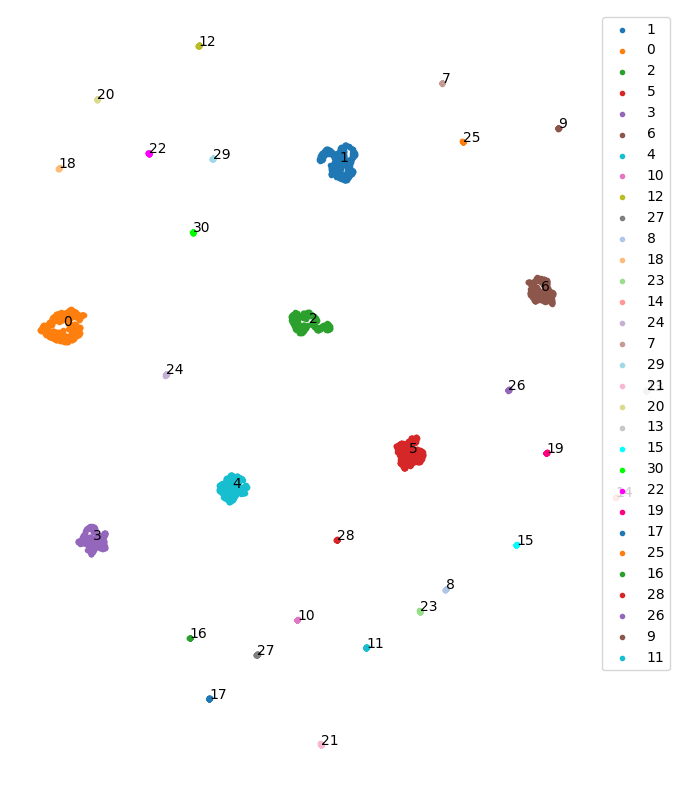

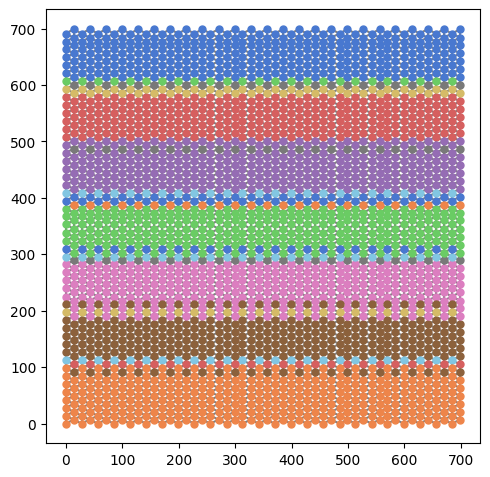

In [81]:
n_neighbors = 10

cluster_params = {
    'reducer_type': 'umap', 
    'n_neighbors': n_neighbors, 
    # 'metric': 'manhattan', # or 'euclidean',
    'metric': 'euclidean', 
    'min_dist': 0.0,
    'clusterer_type': 'leiden', 
    'dim_clust': 2, 
    'k_cluster': n_neighbors, 
    'resolution_parameter': 0.005,
}

cluster_labels, cluster_dir, nb_clust, _ = mosna.get_clusterer(var_aggreg, sof_dir, **cluster_params)

embed_viz, _ = mosna.get_reducer(
    var_aggreg, 
    sof_dir, 
    reducer_type='umap', 
    n_neighbors=n_neighbors, 
    metric='manhattan',
    )

fig, ax, niches_color_mapper = mosna.plot_clusters(
    embed_viz, 
    cluster_labels, 
    sof_dir, 
    cluster_params=cluster_params, 
    return_cmap=True,
    )

niche_colors = np.array([niches_color_mapper[x] for x in cluster_labels])

plots_marker = '.'

edges = pd.read_parquet(reconst_dir / f'edges_patient-{patient_id}_sample-{sample_id}.parquet')
nodes = pd.read_parquet(reconst_dir / f'nodes_patient-{patient_id}_sample-{sample_id}.parquet')
use_cols = [x for x in nodes.columns if x not in ('x', 'y')]
coords = nodes[['y', 'x']].values
nodes = nodes[use_cols]
pairs = edges.values


# Big summary plot
fig, ax = plt.subplots(figsize=(5, 5), tight_layout=False)

ty.plot_network(
    coords, 
    pairs, 
    labels=cluster_labels, 
    marker='.', 
    size_nodes=100, 
    # legend_opt={'loc': 'center left', 'bbox_to_anchor': (1.05, 0.5)},
    ax=ax,
    legend=False,
    )
ax.set_aspect('equal')

ari = adjusted_rand_score(niches, cluster_labels)
print(f"ARI: {ari}")

Computing dimensionality reduction


/home/alexis/miniconda3/envs/mosna-anndata/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
Fitting K-means estimator...
Running initialization...


Performing clustering


Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Fitting K-Means...


Training: 0it [00:00, ?it/s]

Running initialization...


Training: 0it [00:00, ?it/s]

Fitting Gaussian mixture...


Training: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Found 7 clusters
Loading reducer object and reduced coordinates
ARI: 0.5572103524791913


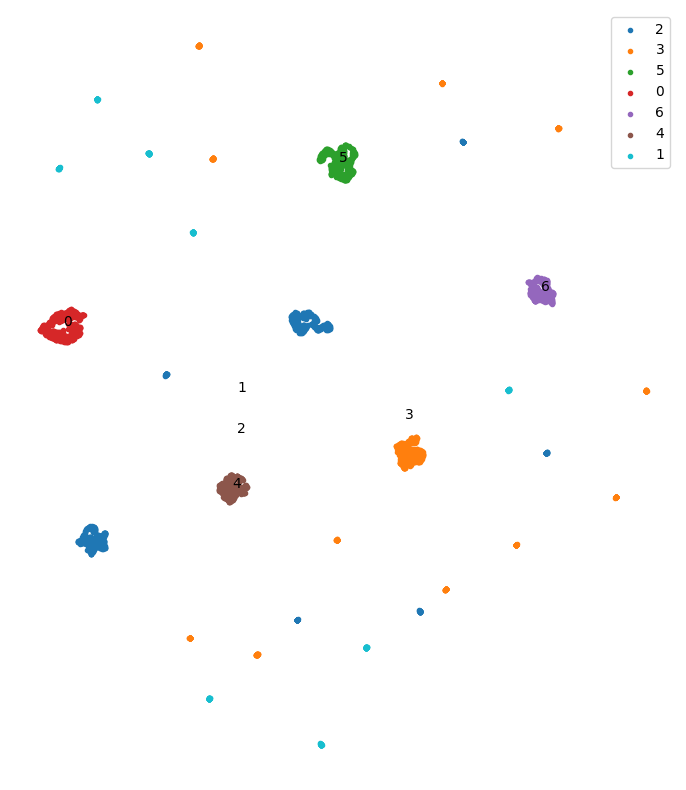

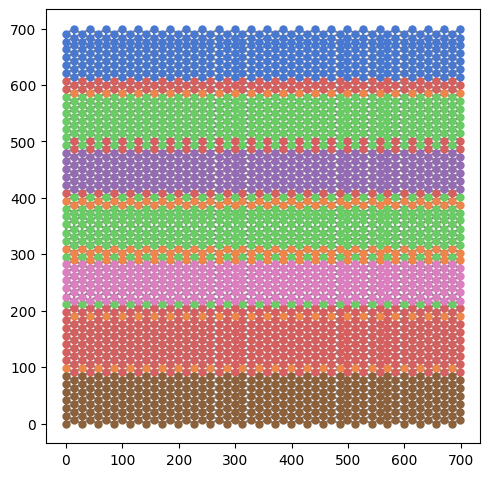

In [82]:
# CellCharter flavour
n_neighbors = 10

cluster_params = {
    'flavor': 'CellCharter',
    # 'reducer_type': 'umap',  # 'umap' if CellCharter
    'n_neighbors': 15, 
    'metric': 'manhattan', # or 'euclidean',
    # 'metric': 'euclidean',
    'min_dist': 0.0,
    # 'clusterer_type': 'leiden', # 'gmm' if CellCharter
    'dim_clust': 2, 
    'n_clusters': 7,
}

cluster_labels, cluster_dir, nb_clust, _ = mosna.get_clusterer(var_aggreg, sof_dir, **cluster_params)

embed_viz, _ = mosna.get_reducer(
    var_aggreg, 
    sof_dir, 
    reducer_type='umap', 
    n_neighbors=n_neighbors, 
    metric='manhattan',
    )

fig, ax, niches_color_mapper = mosna.plot_clusters(
    embed_viz, 
    cluster_labels, 
    sof_dir, 
    cluster_params=cluster_params, 
    return_cmap=True,
    )

niche_colors = np.array([niches_color_mapper[x] for x in cluster_labels])

plots_marker = '.'

edges = pd.read_parquet(reconst_dir / f'edges_patient-{patient_id}_sample-{sample_id}.parquet')
nodes = pd.read_parquet(reconst_dir / f'nodes_patient-{patient_id}_sample-{sample_id}.parquet')
use_cols = [x for x in nodes.columns if x not in ('x', 'y')]
coords = nodes[['y', 'x']].values
nodes = nodes[use_cols]
pairs = edges.values


# Big summary plot
fig, ax = plt.subplots(figsize=(5, 5), tight_layout=False)

ty.plot_network(
    coords, 
    pairs, 
    labels=cluster_labels, 
    marker='.', 
    size_nodes=100, 
    # legend_opt={'loc': 'center left', 'bbox_to_anchor': (1.05, 0.5)},
    ax=ax,
    legend=False,
    )
ax.set_aspect('equal')

ari = adjusted_rand_score(niches, cluster_labels)
print(f"ARI: {ari}")